### Assignment from - https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/02-regression/homework.md

### Dataset from - https://www.kaggle.com/datasets/camnugent/california-housing-prices

## The goal of this notebook is to create a linear regression model for predicting house prices, median_house_value will be what the model will predict.

In [1]:
# Importing neccessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Loading the housing data
df = pd.read_csv("housing.csv")

In [3]:
# Getting the number of rows and columns in the dataset
df.shape

(20640, 10)

In [4]:
# Looking at the first 10 rows in the housing dataset
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [5]:
# Getting the column names of the housing dataset
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
# Getting the datatypes of the different columns
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
# Getting additional info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
# Determining the number of missing values in the different columns in the housing dataset
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

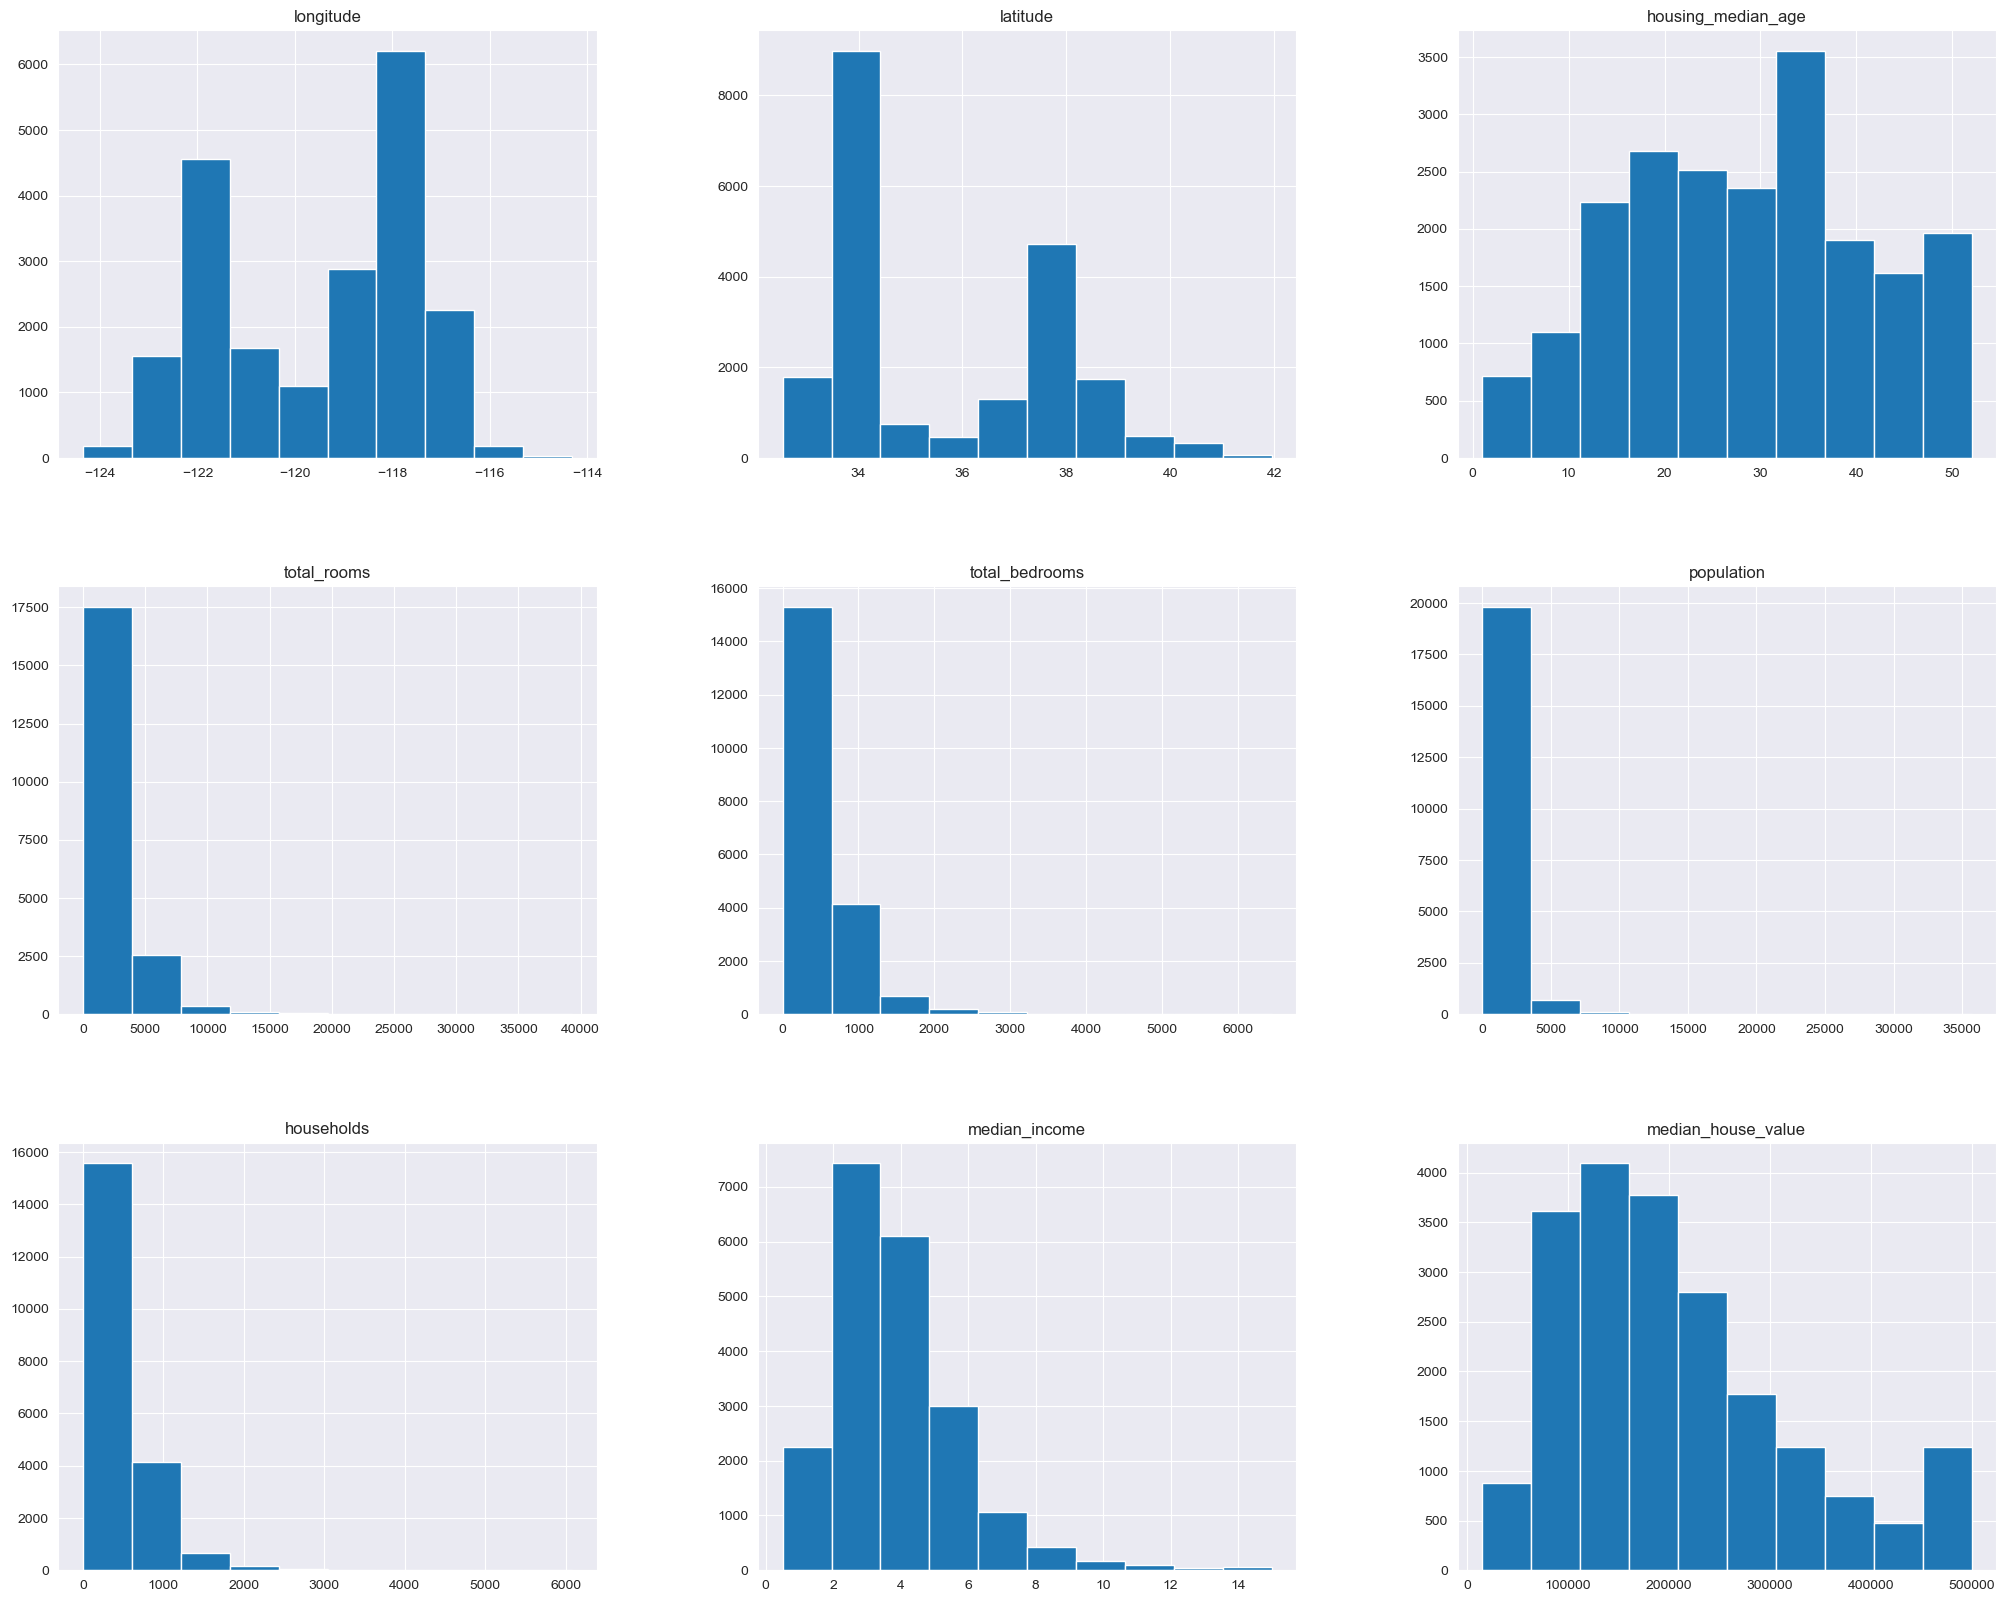

In [9]:
# EDA

# Looking at the distributions of the different columns in the dataframe
sns.set_style("darkgrid")
df.hist(figsize = (25, 20))
plt.show()

### Looking at the histgram distributions, the target, "median_house_value" does have a long tail to the right. To avoid confusing the linear regression model, a logl transformation will be applied to make "median_house_value" a normal distribution.

In [10]:
# Making a new dataframe with just numerical dataypes
df_numerical = df.select_dtypes(include = np.number, exclude = object)

# Verifying df1 is just numerical datatypes
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### Question 1: Find a feature with missing values. How many missing values does it have

In [11]:
# Determining the number of missing values in the different columns in the housing dataset
df_numerical.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Question 1 Answer: "total_bredrooms" is missing values and is missing 207 values.

### Question 2: What's the median (50% percentile) for the variable "population"?

In [12]:
# Calculating median for "population"
df_numerical["population"].median()

1166.0

### Question 2 Answer: The median is 1166.

In [13]:
# Splitting the data in preparation for building, training, and testing a linear regression model

In [14]:
# Defining a seed of 42 for shuffling the dataset
np.random.seed(42)

# Defining the train/val/test splits, using 60% / 20% / 20%  of the distribution
n = len(df_numerical)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

In [15]:
# Shuffling the data
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df_numerical.iloc[idx]

In [16]:
# Creating the train, validate, and test dataframes
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

In [17]:
# Specifying the target, "median_house_value", for use in determining the model's performance
y_train_orig = df_train.median_house_value
y_val_orig = df_val.median_house_value
y_test_orig = df_test.median_house_value

# Applying log transformation to the target, "median_house_value" since the target is skewed to the right
y_train = np.log1p(df_train.median_house_value)
y_val = np.log1p(df_val.median_house_value)
y_test = np.log1p(df_test.median_house_value)

In [18]:
# Deleting the target, "median_house_value", from the train, validation, and test dataframes to eliminate target leakage from happening
del df_train["median_house_value"]
del df_val["median_house_value"]
del df_test["median_house_value"]

In [19]:
# Getting the shapes for the new dataframes
dataframes = [df_train, df_val, df_test]

for dataframe in dataframes:
    print("The shape of the dataframe is:", dataframe.shape)

The shape of the dataframe is: (12384, 8)
The shape of the dataframe is: (4128, 8)
The shape of the dataframe is: (4128, 8)


In [20]:
# Determining where missing values are in the different dataframes
# df_train
df_train.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64

In [21]:
# df_val
df_val.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [22]:
# df_test
df_test.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

### Question 3: 

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

Options:

* With 0
* With mean
* Both are equally good

In [23]:
# Defining a funcation to create a linear regression model
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

#w[0] represents weights for the bias and w[1:] represents the features

In [24]:
# Defining a function to calculate Root Mean Square Error (RMSE)
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [25]:
# Calculating current mean for "total_bedrooms"
df_train["total_bedrooms"].mean()

533.4803317730147

In [26]:
# Option 1 - Filling missing values with 0 for "total_bedrooms"
df_train_option_1 = df_train.copy()

# Using fillna to filling NA values with 0
df_train_option_1["total_bedrooms"] = df_train_option_1["total_bedrooms"].fillna(0)

In [27]:
# Option 1 - Calculating the new mean
df_train_option_1["total_bedrooms"].mean()

524.5631459948321

In [28]:
# Confirming no missing values in the dataframe
df_train_option_1.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [29]:
# Training a linear regression model with option 1
w_0, w = train_linear_regression(df_train_option_1, y_train)

In [30]:
# Calculating prediction with Option 1's weights using validation data
y_pred_option_1 = w_0 + df_val.dot(w)

In [31]:
# Calculating RMSE with validation data for Option 1
round(rmse(y_val, y_pred_option_1), 2)

0.33

In [32]:
# Option 2 - Filling missing values with mean for "total_bedrooms"
df_train_option_2 = df_train.copy()

# Using fillna to filling NA values with mean for "total_bedrooms"
df_train_option_2["total_bedrooms"] = df_train_option_2["total_bedrooms"].fillna(df_train_option_2["total_bedrooms"].mean())

In [33]:
# Option 2 - Calculating the new mean
df_train_option_2["total_bedrooms"].mean()

533.4803317730147

In [34]:
# Confirming no missing values in the dataframe
df_train_option_2.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [35]:
# Training a linear regression model with option 2
w_0, w = train_linear_regression(df_train_option_2, y_train)

In [36]:
# Calculating prediction with Option 2's weights using validation data
y_pred_option_2 = w_0 + df_val.dot(w)

In [37]:
# Calculating RMSE with validation data for Option 2
round(rmse(y_val, y_pred_option_2), 2)

0.33

### Question 3 Answer: Both are equally good

### Question 4: 

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?
* If there are multiple options, select the smallest r.

Options:

* 0
* 0.000001
* 0.001
* 0.0001

In [38]:
# Function for introducing regularization to the linear regression model
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [39]:
# Going to use df_train_option_1 since it already has filled NA's with 0
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(df_train_option_1, y_train, r = r)
    print("%5s, %.2f, %.2f, %.2f" % (r, w_0, w[7], w[7]))

    0, -11.69, 0.17, 0.17
1e-06, -11.69, 0.17, 0.17
0.0001, -11.69, 0.17, 0.17
0.001, -11.67, 0.17, 0.17
 0.01, -11.53, 0.17, 0.17
  0.1, -10.27, 0.17, 0.17
    1, -4.92, 0.18, 0.18
    5, -1.48, 0.19, 0.19
   10, -0.79, 0.19, 0.19


In [40]:
# Calculating RMSE for r = 0
w_0, w = train_linear_regression_reg(df_train_option_1, y_train, r = 0)

# Calculating prediction with validation inputs using weight from regularized linear regression model
y_pred_option_1 = w_0 + df_val.dot(w)
print("val", round(rmse(y_val, y_pred_option_1), 2))

val 0.33


In [41]:
# Calculating RMSE for r = 0.000001
w_0, w = train_linear_regression_reg(df_train_option_1, y_train, r = 0.000001)

# Calculating prediction with validation inputs using weight from regularized linear regression model
y_pred_option_1 = w_0 + df_val.dot(w)
print("val", round(rmse(y_val, y_pred_option_1), 2))

val 0.33


In [42]:
# Calculating RMSE for r = 0.0001
w_0, w = train_linear_regression_reg(df_train_option_1, y_train, r = 0.0001)

# Calculating prediction with validation inputs using weight from regularized linear regression model
y_pred_option_1 = w_0 + df_val.dot(w)
print("val", round(rmse(y_val, y_pred_option_1), 2))

val 0.33


In [43]:
# Calculating RMSE for r = 0.001
w_0, w = train_linear_regression_reg(df_train_option_1, y_train, r = 0.001)

# Calculating prediction with validation inputs using weight from regularized linear regression model
y_pred_option_1 = w_0 + df_val.dot(w)
print("val", round(rmse(y_val, y_pred_option_1), 2))

val 0.33


In [44]:
# Calculating RMSE for r = 0.01
w_0, w = train_linear_regression_reg(df_train_option_1, y_train, r = 0.01)

# Calculating prediction with validation inputs using weight from regularized linear regression model
y_pred_option_1 = w_0 + df_val.dot(w)
print("val", round(rmse(y_val, y_pred_option_1), 2))

val 0.33


In [45]:
# Calculating RMSE for r = 0.1
w_0, w = train_linear_regression_reg(df_train_option_1, y_train, r = 0.1)

# Calculating prediction with validation inputs using weight from regularized linear regression model
y_pred_option_1 = w_0 + df_val.dot(w)
print("val", round(rmse(y_val, y_pred_option_1), 2))

val 0.33


In [46]:
# Calculating RMSE for r = 1
w_0, w = train_linear_regression_reg(df_train_option_1, y_train, r = 1)

# Calculating prediction with validation inputs using weight from regularized linear regression model
y_pred_option_1 = w_0 + df_val.dot(w)
print("val", round(rmse(y_val, y_pred_option_1), 2))

val 0.33


In [47]:
# Calculating RMSE for r = 5
w_0, w = train_linear_regression_reg(df_train_option_1, y_train, r = 5)

# Calculating prediction with validation inputs using weight from regularized linear regression model
y_pred_option_1 = w_0 + df_val.dot(w)
print("val", round(rmse(y_val, y_pred_option_1), 2))

val 0.34


In [48]:
# Calculating RMSE for r = 10
w_0, w = train_linear_regression_reg(df_train_option_1, y_train, r = 10)

# Calculating prediction with validation inputs using weight from regularized linear regression model
y_pred_option_1 = w_0 + df_val.dot(w)
print("val", round(rmse(y_val, y_pred_option_1), 2))

val 0.34


### Question 4 Answer: 0.000001 gives the best RMSE

### Question 5:

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))
* Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

Options:

* 0.16
* 0.00005
* 0.005
* 0.15555

In [49]:
# Creating a loop to iterate through different seed values

# Initiating an empty list to store RMSE values for the different seed values
rmse_val_list = []

for r in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    # Shuffling the dataset
    np.random.seed(r)

    # Shuffling the data
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    df_shuffled = df_numerical.iloc[idx]
    
    # Creating the train, validate, and test dataframes
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
    df_test = df_shuffled.iloc[n_train + n_val:].copy()
    
    # To avoid a new index getting added during each iteration
    df_train = df_train.reset_index(drop = True)
    df_val = df_val.reset_index(drop = True)
    df_test = df_test.reset_index(drop = True)
    
    # Specifying the target, "median_house_value", for use in determining the model's performance
    y_train_orig = df_train.median_house_value
    y_val_orig = df_val.median_house_value
    y_test_orig = df_test.median_house_value
    
    # Applying log transformation to the target, "median_house_value" since the target is skewed to the right
    y_train = np.log1p(df_train.median_house_value)
    y_val = np.log1p(df_val.median_house_value)
    y_test = np.log1p(df_test.median_house_value)
    
    # Deleting the target, "median_house_value", from the train, validation, and test dataframes to eliminate target leakage from happening
    del df_train["median_house_value"]
    del df_val["median_house_value"]
    del df_test["median_house_value"]
    
    # Filling in any NA values with 0
    df_null_train = df_train.fillna(0)
    w_0, w = train_linear_regression(df_null_train, y_train)
    
    df_null_val = df_val.fillna(0)
    y_null_reg_val = w_0 + df_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val), 2)
    
    rmse_val_list.append(rmse_val)
    
    print(r, w_0, rmse_val)

0 -11.900382137793882 0.34
1 -11.732757373142956 0.34
2 -11.806729360848621 0.33
3 -11.587900347765268 0.34
4 -11.389470588137371 0.34
5 -11.447114276130682 0.34
6 -11.370516351941152 0.35
7 -12.473448918383832 0.34
8 -11.800287429606277 0.35
9 -11.459046830677936 0.34


In [50]:
# Calculating standard deviation for the list of RMSE values
st_dev = round(np.std(rmse_val_list), 3)

print("Standard deviation of the given list: " + str(st_dev))

Standard deviation of the given list: 0.005


### Question 5 Answer: The standard deviation is 0.005.

### Question 6:

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

Options:

* 0.35
* 0.135
* 0.450
* 0.245

In [51]:
# Shuffling the dataset
np.random.seed(9)

# Shuffling the data
idx = np.arange(n)
np.random.shuffle(idx)
    
df_shuffled = df_numerical.iloc[idx]
    
# Creating the train, validate, and test dataframes
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()
    
# Specifying the target, "median_house_value", for use in determining the model's performance
y_train_orig = df_train.median_house_value
y_val_orig = df_val.median_house_value
y_test_orig = df_test.median_house_value
    
# Applying log transformation to the target, "median_house_value" since the target is skewed to the right
y_train = np.log1p(df_train.median_house_value)
y_val = np.log1p(df_val.median_house_value)
y_test = np.log1p(df_test.median_house_value)
    
# Deleting the target, "median_house_value", from the train, validation, and test dataframes to eliminate target leakage from happening
del df_train["median_house_value"]
del df_val["median_house_value"]
del df_test["median_house_value"]

# Joining training and validation dataframes together
frames = [df_train, df_val]

df_train_val = pd.concat(frames)

# Joining target training and validation dataframes together
target_frames = [y_train, y_val]

y_train_val = pd.concat(target_frames)

# Filling any missing values with 0 for df_train_val
df_train_val = df_train_val.fillna(0)

# Calculating RMSE for r = 0.001
w_0, w = train_linear_regression_reg(df_train_val, y_train_val, r = 0.001)

# Calculating prediction with train + val inputs using weight from regularized linear regression model
df_test = df_test.fillna(0)
y_pred_test = w_0 + df_test.dot(w)
print("test", round(rmse(y_test, y_pred_test), 2))

test 0.35


### Question 6 Answer: The RMSE for the test dataset is 0.35.